In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = make_classification(n_samples=300,n_features=2,n_classes=4,n_redundant=0,n_clusters_per_class=1,n_informative=2)

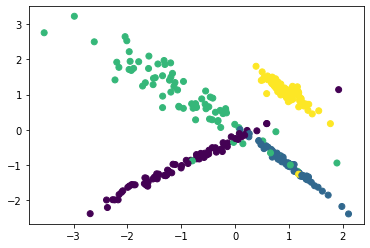

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);

In [5]:
def plot_decision_boundary(data,labels,clf):
    plot_step = 0.02
    x_min, x_max = data[:,0].min() -1, data[:,0].max() + 1
    y_min,y_max = data[:,1].min() -1 , data[:,1].max() + 1

    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))
    Z = np.array(clf.predict(np.c_[xx.ravel(),yy.ravel()]))
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,Z,cmap='cool')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')

    plt.scatter(data[:,0],data[:,1],c=labels,cmap='hot',s=20)
    plt.show()

### Question a (3 points)

In [6]:
length = X.shape[0]
test_index = list(np.random.choice(range(length), size = int(length * 0.2), replace = False))
train_index = [_ for _ in range(length)]
for i in test_index:
    train_index.remove(i)

In [7]:
X_train = X[train_index]
y_train = y[train_index]

In [8]:
X_test = X[test_index]
y_test = y[test_index]

### Question b (5 points)

In [9]:
dtc_hyper_params = [{'max_depth': _} for _ in  [5, 10, 15]]

In [10]:
scores = [] # accuracy scores
conf_ms = [] # confusion matrixes

for hyper_param in dtc_hyper_params:
    T_clf = DecisionTreeClassifier(**hyper_param)
    T_clf.fit(X_train, y_train)
    pred_test = T_clf.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    scores.append(score)
    conf_m = confusion_matrix(y_test, pred_test)
    conf_ms.append(conf_m)

In [11]:
scores

[0.9833333333333333, 0.9333333333333333, 0.95]

In [12]:
conf_ms

[array([[19,  0,  0,  0],
        [ 0, 10,  0,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]]),
 array([[18,  0,  1,  0],
        [ 0,  8,  2,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]]),
 array([[18,  0,  1,  0],
        [ 0,  9,  1,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]])]

In [13]:
best_params = dtc_hyper_params[0]
T_clf = DecisionTreeClassifier(**best_params)
T_clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

### Question c (5 points)

In [14]:
rf_hyper_params = [{'n_estimators' : 1, 'max_features': 'sqrt', 'min_samples_leaf': _, 'max_depth': _}
                   for _ in [5, 10, 15]]

In [15]:
scores = [] # accuracy scores
conf_ms = [] # confusion matrixes

for hyper_param in rf_hyper_params:
    rf_clf = RandomForestClassifier(**hyper_param)
    rf_clf.fit(X_train, y_train)
    pred_test = rf_clf.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    scores.append(score)
    conf_m = confusion_matrix(y_test, pred_test)
    conf_ms.append(conf_m)

In [16]:
scores

[0.95, 0.9666666666666667, 0.9833333333333333]

In [17]:
conf_ms

[array([[19,  0,  0,  0],
        [ 0,  9,  1,  0],
        [ 0,  1, 16,  0],
        [ 0,  1,  0, 13]]),
 array([[19,  0,  0,  0],
        [ 0, 10,  0,  0],
        [ 0,  1, 16,  0],
        [ 0,  1,  0, 13]]),
 array([[19,  0,  0,  0],
        [ 0, 10,  0,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]])]

In [18]:
best_params = rf_hyper_params[2]
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X, y)

RandomForestClassifier(max_depth=15, min_samples_leaf=15, n_estimators=1)

### Question d (5 points)

In [19]:
ada_hyper_params = [({'max_depth': _}, {'n_estimators': 1, 'learning_rate': _ / 20}) for _ in [1, 5, 10]]

In [20]:
scores = [] # accuracy scores
conf_ms = [] # confusion matrixes

for hyper_param in ada_hyper_params:
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(**hyper_param[0]), **hyper_param[1])
    ada_clf.fit(X_train, y_train)
    pred_test = ada_clf.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    scores.append(score)
    conf_m = confusion_matrix(y_test, pred_test)
    conf_ms.append(conf_m)

In [21]:
scores

[0.43333333333333335, 0.9833333333333333, 0.95]

In [22]:
conf_ms

[array([[ 0,  0, 19,  0],
        [ 0, 10,  0,  0],
        [ 0,  1, 16,  0],
        [ 0, 14,  0,  0]]),
 array([[19,  0,  0,  0],
        [ 0, 10,  0,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]]),
 array([[18,  0,  1,  0],
        [ 0,  9,  1,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]])]

In [23]:
best_params = ada_hyper_params[1]
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(**best_params[0]), **best_params[1])
ada_clf.fit(X, y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.25, n_estimators=1)

### Question e (10 points)

In [24]:
gb_hyper_params = [{'n_estimators': 1, 'reg_lambda': np.exp(_), 'num_leaves': 3, 'learning_rate': _}
                   for _ in [0.001, 0.01, 0.1]]

In [25]:
scores = [] # accuracy scores
conf_ms = [] # confusion matrixes

for hyper_param in gb_hyper_params:
    gb_clf = LGBMClassifier(**hyper_param)
    gb_clf.fit(X_train, y_train)
    pred_test = gb_clf.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    scores.append(score)
    conf_m = confusion_matrix(y_test, pred_test)
    conf_ms.append(conf_m)

In [26]:
scores

[0.16666666666666666, 0.4, 0.9833333333333333]

In [27]:
conf_ms

[array([[ 0, 19,  0,  0],
        [ 0, 10,  0,  0],
        [ 0, 17,  0,  0],
        [ 0, 14,  0,  0]]),
 array([[ 0, 19,  0,  0],
        [ 0, 10,  0,  0],
        [ 0, 17,  0,  0],
        [ 0,  0,  0, 14]]),
 array([[19,  0,  0,  0],
        [ 0, 10,  0,  0],
        [ 0,  1, 16,  0],
        [ 0,  0,  0, 14]])]

In [28]:
best_params = gb_hyper_params[2]
gb_clf = LGBMClassifier(**best_params)
gb_clf.fit(X, y)

LGBMClassifier(n_estimators=1, num_leaves=3, reg_lambda=1.1051709180756477)

### Question f (2 points)

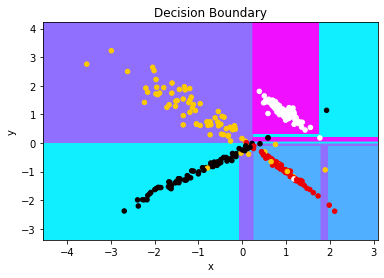

In [29]:
plot_decision_boundary(X, y, T_clf)

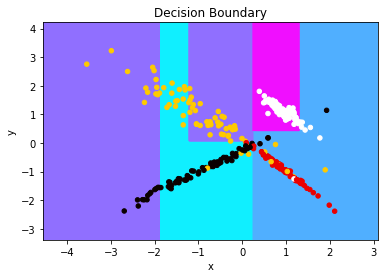

In [30]:
plot_decision_boundary(X, y, rf_clf)

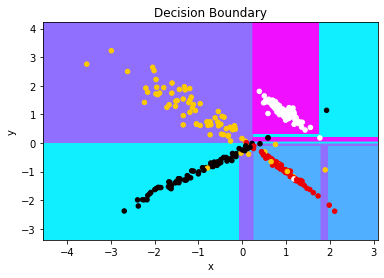

In [31]:
plot_decision_boundary(X, y, ada_clf)

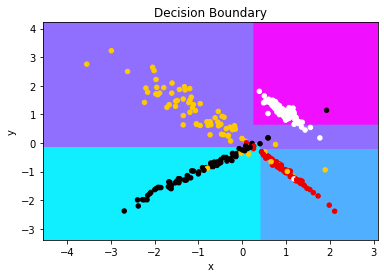

In [32]:
plot_decision_boundary(X, y, gb_clf)